In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker


In [2]:
def cosim(user_a, user_b):
    """calculate the cosine similarity"""
    user_a = np.nan_to_num(user_a)
    user_b = np.nan_to_num(user_b)
    return np.dot(user_a, user_b.T) / (np.abs(user_a).sum() * np.abs(user_b).sum())

In [3]:
HOST = 'localhost'
PORT = '5432'
USERNAME = 'flann'
PASSWORD = os.getenv('pgpassword')
DB = 'movies'
conn_string = f'postgres://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DB}'

engine = create_engine(conn_string, echo=True)
Session = sessionmaker(bind=engine)
session = Session()

In [14]:
ratings = pd.read_sql_table('ratings',engine)
tags = pd.read_sql_table('tags',engine)
links = pd.read_sql_table('links',engine)
movies = pd.read_sql_table('movies',engine)

merged_with_ratings = ratings.merge(movies, on='movieId', how="inner")
rating_matrix = merged_with_ratings.set_index(['userId', 'movieId'])['rating'].unstack(-1)

2020-03-10 17:28:04,784 INFO sqlalchemy.engine.base.Engine select version()
2020-03-10 17:28:04,785 INFO sqlalchemy.engine.base.Engine {}
2020-03-10 17:28:04,787 INFO sqlalchemy.engine.base.Engine select current_schema()
2020-03-10 17:28:04,787 INFO sqlalchemy.engine.base.Engine {}
2020-03-10 17:28:04,789 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-03-10 17:28:04,790 INFO sqlalchemy.engine.base.Engine {}
2020-03-10 17:28:04,791 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-03-10 17:28:04,792 INFO sqlalchemy.engine.base.Engine {}
2020-03-10 17:28:04,793 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2020-03-10 17:28:04,794 INFO sqlalchemy.engine.base.Engine {}
2020-03-10 17:28:04,796 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind in ('r', 'p')
2020-0

2020-03-10 17:28:04,838 INFO sqlalchemy.engine.base.Engine {'table_oid': 20254}
2020-03-10 17:28:04,839 INFO sqlalchemy.engine.base.Engine 
        SELECT conname
           FROM  pg_catalog.pg_constraint r
           WHERE r.conrelid = %(table_oid)s AND r.contype = 'p'
           ORDER BY 1
        
2020-03-10 17:28:04,840 INFO sqlalchemy.engine.base.Engine {'table_oid': 20254}
2020-03-10 17:28:04,842 INFO sqlalchemy.engine.base.Engine 
          SELECT r.conname,
                pg_catalog.pg_get_constraintdef(r.oid, true) as condef,
                n.nspname as conschema
          FROM  pg_catalog.pg_constraint r,
                pg_namespace n,
                pg_class c

          WHERE r.conrelid = %(table)s AND
                r.contype = 'f' AND
                c.oid = confrelid AND
                n.oid = c.relnamespace
          ORDER BY 1
        
2020-03-10 17:28:04,843 INFO sqlalchemy.engine.base.Engine {'table': 20254}
2020-03-10 17:28:04,845 INFO sqlalchemy.engine.base.E

2020-03-10 17:28:05,212 INFO sqlalchemy.engine.base.Engine {'table_oid': 20278}
2020-03-10 17:28:05,214 INFO sqlalchemy.engine.base.Engine 
            SELECT t.typname as "name",
               pg_catalog.format_type(t.typbasetype, t.typtypmod) as "attype",
               not t.typnotnull as "nullable",
               t.typdefault as "default",
               pg_catalog.pg_type_is_visible(t.oid) as "visible",
               n.nspname as "schema"
            FROM pg_catalog.pg_type t
               LEFT JOIN pg_catalog.pg_namespace n ON n.oid = t.typnamespace
            WHERE t.typtype = 'd'
        
2020-03-10 17:28:05,214 INFO sqlalchemy.engine.base.Engine {}
2020-03-10 17:28:05,216 INFO sqlalchemy.engine.base.Engine 
            SELECT t.typname as "name",
               -- no enum defaults in 8.4 at least
               -- t.typdefault as "default",
               pg_catalog.pg_type_is_visible(t.oid) as "visible",
               n.nspname as "schema",
               e.enumlabel as

2020-03-10 17:28:05,255 INFO sqlalchemy.engine.base.Engine 
            SELECT
                cons.conname as name,
                cons.conkey as key,
                a.attnum as col_num,
                a.attname as col_name
            FROM
                pg_catalog.pg_constraint cons
                join pg_attribute a
                  on cons.conrelid = a.attrelid AND
                    a.attnum = ANY(cons.conkey)
            WHERE
                cons.conrelid = %(table_oid)s AND
                cons.contype = 'u'
        
2020-03-10 17:28:05,256 INFO sqlalchemy.engine.base.Engine {'table_oid': 20254}
2020-03-10 17:28:05,258 INFO sqlalchemy.engine.base.Engine 
            SELECT
                cons.conname as name,
                pg_get_constraintdef(cons.oid) as src
            FROM
                pg_catalog.pg_constraint cons
            WHERE
                cons.conrelid = %(table_oid)s AND
                cons.contype = 'c'
        
2020-03-10 17:28:05,259 INFO sqlalc

2020-03-10 17:28:05,323 INFO sqlalchemy.engine.base.Engine {'table_oid': 20293}
2020-03-10 17:28:05,327 INFO sqlalchemy.engine.base.Engine 
          SELECT r.conname,
                pg_catalog.pg_get_constraintdef(r.oid, true) as condef,
                n.nspname as conschema
          FROM  pg_catalog.pg_constraint r,
                pg_namespace n,
                pg_class c

          WHERE r.conrelid = %(table)s AND
                r.contype = 'f' AND
                c.oid = confrelid AND
                n.oid = c.relnamespace
          ORDER BY 1
        
2020-03-10 17:28:05,328 INFO sqlalchemy.engine.base.Engine {'table': 20293}
2020-03-10 17:28:05,330 INFO sqlalchemy.engine.base.Engine 
            SELECT c.oid
            FROM pg_catalog.pg_class c
            LEFT JOIN pg_catalog.pg_namespace n ON n.oid = c.relnamespace
            WHERE (pg_catalog.pg_table_is_visible(c.oid))
            AND c.relname = %(table_name)s AND c.relkind in
            ('r', 'v', 'm', 'f', 'p')
 

2020-03-10 17:28:05,363 INFO sqlalchemy.engine.base.Engine {'table_oid': 20293}
2020-03-10 17:28:05,366 INFO sqlalchemy.engine.base.Engine 
            SELECT
                cons.conname as name,
                cons.conkey as key,
                a.attnum as col_num,
                a.attname as col_name
            FROM
                pg_catalog.pg_constraint cons
                join pg_attribute a
                  on cons.conrelid = a.attrelid AND
                    a.attnum = ANY(cons.conkey)
            WHERE
                cons.conrelid = %(table_oid)s AND
                cons.contype = 'u'
        
2020-03-10 17:28:05,367 INFO sqlalchemy.engine.base.Engine {'table_oid': 20293}
2020-03-10 17:28:05,369 INFO sqlalchemy.engine.base.Engine 
            SELECT
                cons.conname as name,
                pg_get_constraintdef(cons.oid) as src
            FROM
                pg_catalog.pg_constraint cons
            WHERE
                cons.conrelid = %(table_oid)s AND

2020-03-10 17:28:05,441 INFO sqlalchemy.engine.base.Engine {'table_oid': 20254}
2020-03-10 17:28:05,444 INFO sqlalchemy.engine.base.Engine 
            SELECT
                cons.conname as name,
                pg_get_constraintdef(cons.oid) as src
            FROM
                pg_catalog.pg_constraint cons
            WHERE
                cons.conrelid = %(table_oid)s AND
                cons.contype = 'c'
        
2020-03-10 17:28:05,445 INFO sqlalchemy.engine.base.Engine {'table_oid': 20254}
2020-03-10 17:28:05,447 INFO sqlalchemy.engine.base.Engine 
            SELECT
                pgd.description as table_comment
            FROM
                pg_catalog.pg_description pgd
            WHERE
                pgd.objsubid = 0 AND
                pgd.objoid = %(table_oid)s
        
2020-03-10 17:28:05,448 INFO sqlalchemy.engine.base.Engine {'table_oid': 20254}
2020-03-10 17:28:05,449 INFO sqlalchemy.engine.base.Engine SELECT movies."movieId", movies.title, movies.genres 
FRO

In [154]:
user_1, user_2 = rating_matrix[1], rating_matrix[2]
cosim(user_1, user_2)

0.002817122701169742

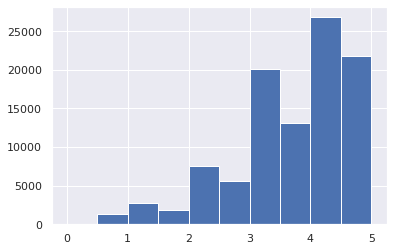

In [155]:
# distribution of all ratings
ratings['rating'].hist(bins=np.arange(0,5.5,0.5));

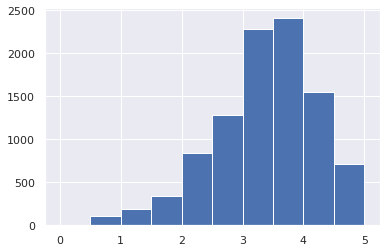

In [156]:
# distribution of average ratings
ratings.groupby(['movieId'])['rating'].mean().hist(bins=np.arange(0,5.5,0.5));

In [51]:
dups = movies[movies.duplicated(subset=['title'], keep=False)]
dups['movieId']

651        838
2143      2851
4169      6003
5601     26958
5854     32600
5932     34048
6934     64997
9106    144606
9135    147002
9468    168358
Name: movieId, dtype: int64

In [52]:
ratings[ratings['movieId'].isin(dups['movieId'])]['movieId'].unique()

array([  2851,    838,  34048,  64997,   6003, 144606, 147002,  26958,
       168358,  32600])

In [100]:
# movies ordered by rating and number of ratings
ordered = merged_with_ratings.groupby(['movieId']).agg({'rating':'mean', 'userId':'count'})
ordered = ordered.sort_values(['rating', 'userId'], ascending=False)
ordered = ordered.merge(movies, left_index=True, right_on='movieId')[['rating', 'userId', 'title', 'genres']]
ordered = ordered.rename(columns={'userId':'ratings_count'})
ordered[ordered['ratings_count']>2]

,rating,ratings_count,title,genres
4396,4.900000,5,"Trial, The (Procès, Le) (1962)",Drama
5580,4.833333,3,Bad Boy Bubby (1993),Drama
8536,4.833333,3,What We Do in the Shadows (2014),Comedy|Horror
9618,4.750000,8,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2424,4.750000,4,Woman in the Dunes (Suna no onna) (1964),Drama
...,...,...,...,...
4593,0.833333,3,It's Pat (1994),Comedy
6141,0.833333,3,Date Movie (2006),Comedy|Romance
6837,0.833333,3,Disaster Movie (2008),Comedy
5180,0.800000,5,Police Academy: Mission to Moscow (1994),Comedy|Crime


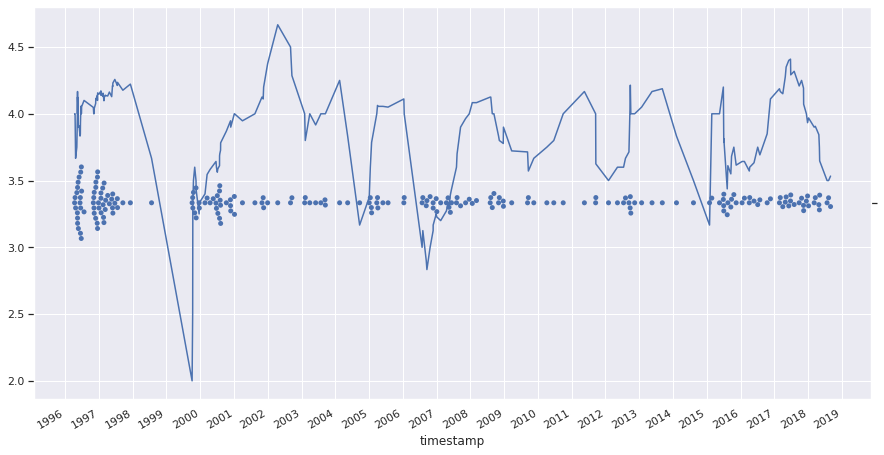

In [101]:
# plot rating of toy story against time
fig, ax = plt.subplots(figsize=(15,8))
merged_with_ratings['timestamp'] = pd.to_datetime(merged_with_ratings['timestamp'], unit='s')
movie = 'Toy Story (1995)'
ratings_time_series = merged_with_ratings.set_index('timestamp').sort_index()
ratings_time_series_rolling = ratings_time_series[ratings_time_series['title'] == movie].rolling('365D')
ratings_time_series_rolling = ratings_time_series_rolling.agg({'rating':'mean', 'userId':'count'})
ratings_time_series_rolling['rating'].plot(ax=ax);
# ratings_time_series_rolling['userId'].plot(ax=ax);
ax2 = ax.twinx()
sns.swarmplot('timestamp', data=ratings_time_series_rolling.reset_index(), ax=ax2)
ax.xaxis.set_major_locator(years);
ax.xaxis.set_major_formatter(yearsFmt);